In [1]:
# import the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import mailbox

In [2]:
# Load the mailbox dataset 
mboxfile = "All mail Including Spam and Trash.mbox" 
mbox = mailbox.mbox(mboxfile) 
mbox

In [3]:
# Lets take a look at the list of available keys
for key in mbox[0].keys():  
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
Received
Date
From
Reply-To
To
Message-ID
Subject
MIME-Version
Content-Type
Content-Transfer-Encoding
Feedback-ID
X-eC-messenger-mid
List-Id
X-eC-messenger-cid
X-eC-messenger-token
X-Route-Id
List-Unsubscribe
List-Unsubscribe-Post
X-eC-messenger-sender-domain
X-eC-messenger-sendouttypeid
X-eC-messenger-addresseeroleid
X-eC-messenger-recipienttypeid
List-Help
X-CSA-Complaints
X-Mailer
X-eC-messenger-email


<p>Although the extracted data returns a lot ofthings, we do not need all the products.
We will only extract the fields that are needed.One of the important steps in the data analysis process is data cleansing.All we need for our analysis is data for the following: subject, from, date, to, label, and thread.</p>
<p>Lets look at the steps in Data Transformation:</p>


<b>Data Cleansing </b>

Start with creating a csv file for the available data and select the importamt coloumns required for analysis

In [4]:
# create a csv file for th data 
import csv
with open('mailbox.csv', 'w',encoding="utf-8") as outputfile: 
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])  
    for message in mbox:    
        writer.writerow([
                        message['subject'], \
                         message['from'], \
                         message['date'], \
                         message['to'], \
                         message['X-Gmail-Labels'], \
                         message['X-GM-THRID'] \
                        ])

The above code will generate mailbox.csv as the output file.Next, we will use the CSV file for loading instead of loading the mbox file, which will be smaller than the initial dataset.

Now lets load the CSV file 

In [5]:
mail_data = pd.read_csv('mailbox.csv')

Now lets check the data types of each of the columns

In [6]:
mail_data.dtypes

subject    object
from       object
date       object
to         object
label      object
thread      int64
dtype: object

Notice that the date column is of type object. So, we need to convert it into an argument of DateTime. We're going to convert the date field to the actual DateTime statement in the next step. 

In [7]:
mail_data['date'] = mail_data['date'].apply(lambda x: pd.to_datetime(x,errors='coerce', utc=True))
mail_data.head(5)

C:\Users\MayurNaik\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Users\MayurNaik\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Users\MayurNaik\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,subject,from,date,to,label,thread
0,=?UTF-8?Q?It_isn=E2=80=99t_over_till_?=\r\n =?...,Swiggy <alerts@updates.swiggy.in>,2020-10-26 06:58:54+00:00,mnaik0593@gmail.com,"Inbox,Opened,Category Updates",1681599553301508655
1,Prathamesh sent you a new message,Prathamesh Chavan via LinkedIn <messaging-dige...,2020-10-26 16:46:20+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Opened,Category Updates",1681633610369513730
2,1 new data analyst job in D01,CV-Library <admin@cv-library.ie>,2020-10-26 08:23:51+00:00,mnaik0593@gmail.com,"Inbox,Opened,Category Updates",1681601993077280278
3,Applicants REQUESTED,""" Work"" <Listings@jobcrown.co.uk>",2020-10-27 16:42:49+00:00,<mnaik0593@gmail.com>,"Inbox,Important,Opened,Category Updates",1681723983267999211
4,=?UTF-8?Q?=F0=9F=94=84_Irish_Times_World_Tweet...,Twitter <info@twitter.com>,2020-10-26 13:14:22+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Category Social,Unread",1681620272878112536


Now that we have converted the date into datetime, let remove the NaN values from the dataset

In [8]:
mail_data.shape

(17040, 6)

In [9]:
mail_data['date'].isnull().sum()

197

Now lets remove these NaN values form the data 

In [10]:
mail_data = mail_data[mail_data['date'].notna()]

In [11]:
mail_data.shape

(16843, 6)

<b> Applying descriptive statistics </b>

Let's do some sanity testing using descriptive statistics techniques after preprocessing the dataset. 

In [12]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16843 entries, 0 to 17039
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  16720 non-null  object             
 1   from     16842 non-null  object             
 2   date     16843 non-null  datetime64[ns, UTC]
 3   to       16817 non-null  object             
 4   label    16843 non-null  object             
 5   thread   16843 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 921.1+ KB


Notice that there are 16843 emails with six columns per email- subject, from, date, to, label, and thread. Let's search the email dataset for the first few entries: 

In [13]:
mail_data.head(10)

,subject,from,date,to,label,thread
0,=?UTF-8?Q?It_isn=E2=80=99t_over_till_?=\r\n =?...,Swiggy <alerts@updates.swiggy.in>,2020-10-26 06:58:54+00:00,mnaik0593@gmail.com,"Inbox,Opened,Category Updates",1681599553301508655
1,Prathamesh sent you a new message,Prathamesh Chavan via LinkedIn <messaging-dige...,2020-10-26 16:46:20+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Opened,Category Updates",1681633610369513730
2,1 new data analyst job in D01,CV-Library <admin@cv-library.ie>,2020-10-26 08:23:51+00:00,mnaik0593@gmail.com,"Inbox,Opened,Category Updates",1681601993077280278
3,Applicants REQUESTED,""" Work"" <Listings@jobcrown.co.uk>",2020-10-27 16:42:49+00:00,<mnaik0593@gmail.com>,"Inbox,Important,Opened,Category Updates",1681723983267999211
4,=?UTF-8?Q?=F0=9F=94=84_Irish_Times_World_Tweet...,Twitter <info@twitter.com>,2020-10-26 13:14:22+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Category Social,Unread",1681620272878112536
5,=?utf-8?Q?Running=20low=20on=20resume=20scans=...,=?utf-8?Q?Jobscan=20Team?= <team@jobscan.co>,2020-10-27 13:41:45+00:00,<mnaik0593@gmail.com>,"Inbox,Opened,Category Updates",1681712730499514918
6,=?utf-8?B?RGF0YW1pbnIgd2FudHMgeW91IQ==?=,Neuvoo Jobs<job@neuvoo.com>,2020-10-24 06:09:04+00:00,mnaik0593@gmail.com,"Inbox,Important,Opened,Category Updates",1681412316414776766
7,"The name ""Mayur Naik"" is mentioned in a PDF up...","""Academia.edu"" <premium@academia-mail.com>",2020-10-24 14:14:49+00:00,mnaik0593@gmail.com,"Inbox,Category Promotions,Unread",1681442881154870276
8,=?utf-8?q?Are_the_Irish_British=3F?=,Quora Digest <digest-noreply@quora.com>,2020-10-26 14:40:54+00:00,mnaik0593@gmail.com,"Inbox,Category Social,Unread",1681625716361275969
9,New jobs posted from careers.glanbia.com,glanbiaplc-jobnotification@noreply12.jobs2web.com,2020-10-28 01:35:15+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Opened,Category Updates",1681757481153364149


Notice that there are six separate columns in our dataframe so far. Take a look at the field from: contain it both the name and the email. We only need an email address for our study. For refactoring the column, we can use a regular expression 

In [14]:
import re

In [25]:
def extract_email_ID(string):  
    email = re.findall(r'<(.+?)>', string)  
    if not email:    
        email = list(filter(lambda y: '@' in y, string.split()))  
    return email[0] if email else np.nan 

In the preciding code, in order to find an email address, we used a regular expression. We populate the field with NaN if there is no email address. 

Now lets apply the function to the from column of our dataframe using the lambda function

In [26]:
mail_data['from'] = mail_data['from'].apply(lambda x: extract_email_ID(str(x)))

In [29]:
mail_data.head(5)

,subject,from,date,to,label,thread
0,=?UTF-8?Q?It_isn=E2=80=99t_over_till_?=\r\n =?...,alerts@updates.swiggy.in,2020-10-26 06:58:54+00:00,mnaik0593@gmail.com,"Inbox,Opened,Category Updates",1681599553301508655
1,Prathamesh sent you a new message,messaging-digest-noreply@linkedin.com,2020-10-26 16:46:20+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Opened,Category Updates",1681633610369513730
2,1 new data analyst job in D01,admin@cv-library.ie,2020-10-26 08:23:51+00:00,mnaik0593@gmail.com,"Inbox,Opened,Category Updates",1681601993077280278
3,Applicants REQUESTED,Listings@jobcrown.co.uk,2020-10-27 16:42:49+00:00,<mnaik0593@gmail.com>,"Inbox,Important,Opened,Category Updates",1681723983267999211
4,=?UTF-8?Q?=F0=9F=94=84_Irish_Times_World_Tweet...,info@twitter.com,2020-10-26 13:14:22+00:00,Mayur Naik <mnaik0593@gmail.com>,"Inbox,Category Social,Unread",1681620272878112536


Now we are going to refactorize the label field. we will do this by using the below logic:
If email address contains our own email id (mnaik0593@gmail.com), then it is the email sent. Otherwise, it is an received email, i.e. an inbox email

In [30]:
my_email_id = 'mnaik0593@gmail.com'
mail_data['label'] = mail_data['from'].apply(lambda x: 'sent' if x==my_email_id else 'inbox') 

In [31]:
mail_data.head(5)

,subject,from,date,to,label,thread
0,=?UTF-8?Q?It_isn=E2=80=99t_over_till_?=\r\n =?...,alerts@updates.swiggy.in,2020-10-26 06:58:54+00:00,mnaik0593@gmail.com,inbox,1681599553301508655
1,Prathamesh sent you a new message,messaging-digest-noreply@linkedin.com,2020-10-26 16:46:20+00:00,Mayur Naik <mnaik0593@gmail.com>,inbox,1681633610369513730
2,1 new data analyst job in D01,admin@cv-library.ie,2020-10-26 08:23:51+00:00,mnaik0593@gmail.com,inbox,1681601993077280278
3,Applicants REQUESTED,Listings@jobcrown.co.uk,2020-10-27 16:42:49+00:00,<mnaik0593@gmail.com>,inbox,1681723983267999211
4,=?UTF-8?Q?=F0=9F=94=84_Irish_Times_World_Tweet...,info@twitter.com,2020-10-26 13:14:22+00:00,Mayur Naik <mnaik0593@gmail.com>,inbox,1681620272878112536


<b> Dropping Cloumns </b>

Notice that in 'to' column only my email id is included. So, we shouldonly drop this column as we have reduntant information 
⠀ 

In [32]:
mail_data.drop(columns = 'to', inplace = True)

In [33]:
mail_data.head(5)

,subject,from,date,label,thread
0,=?UTF-8?Q?It_isn=E2=80=99t_over_till_?=\r\n =?...,alerts@updates.swiggy.in,2020-10-26 06:58:54+00:00,inbox,1681599553301508655
1,Prathamesh sent you a new message,messaging-digest-noreply@linkedin.com,2020-10-26 16:46:20+00:00,inbox,1681633610369513730
2,1 new data analyst job in D01,admin@cv-library.ie,2020-10-26 08:23:51+00:00,inbox,1681601993077280278
3,Applicants REQUESTED,Listings@jobcrown.co.uk,2020-10-27 16:42:49+00:00,inbox,1681723983267999211
4,=?UTF-8?Q?=F0=9F=94=84_Irish_Times_World_Tweet...,info@twitter.com,2020-10-26 13:14:22+00:00,inbox,1681620272878112536


Now if we look at our data then we can observe that our fields are cleaned and the data is transformed correctly into their respective format

<b> Refactoring timezones </b>

Now the next step is to refactor the timezones into our timezone

In [36]:
import datetime 
import pytz

In [41]:
def refactor_timezone(x):  
    est = pytz.timezone('Etc/GMT-0')  
    return x.astimezone(est)

In [43]:
mail_data['date'] = mail_data['date'].apply(lambda x: refactor_timezone(x))

Now, we want to convert the day of the week variable into the name of the day,3. as in, Saturday, Sunday, and so on.


In [48]:
mail_data['dayofweek'] = mail_data['date'].apply(lambda x: x.day_name())
mail_data['dayofweek'] = pd.Categorical(mail_data['dayofweek'], \
                         categories=['Monday', 'Tuesday', \
                                     'Wednesday', 'Thursday',\
                                     'Friday','Saturday', \
                                     'Sunday'], ordered=True)

Now we need to create a column for time of the day

In [50]:
mail_data['timeofday'] = mail_data['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

Next, we refactor the hour, the year integer, and the year fraction, respectively

In [52]:
mail_data['hour'] = mail_data['date'].apply(lambda x: x.hour)

In [53]:
mail_data['year_int'] = mail_data['date'].apply(lambda x: x.year)

In [54]:
mail_data['year'] = mail_data['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [55]:
mail_data.head(5)

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
0,=?UTF-8?Q?It_isn=E2=80=99t_over_till_?=\r\n =?...,alerts@updates.swiggy.in,2020-10-26 06:58:54+00:00,inbox,1681599553301508655,Monday,6.981667,6,2020,2020.821355
1,Prathamesh sent you a new message,messaging-digest-noreply@linkedin.com,2020-10-26 16:46:20+00:00,inbox,1681633610369513730,Monday,16.772222,16,2020,2020.821355
2,1 new data analyst job in D01,admin@cv-library.ie,2020-10-26 08:23:51+00:00,inbox,1681601993077280278,Monday,8.397500,8,2020,2020.821355
3,Applicants REQUESTED,Listings@jobcrown.co.uk,2020-10-27 16:42:49+00:00,inbox,1681723983267999211,Tuesday,16.713611,16,2020,2020.824093
4,=?UTF-8?Q?=F0=9F=94=84_Irish_Times_World_Tweet...,info@twitter.com,2020-10-26 13:14:22+00:00,inbox,1681620272878112536,Monday,13.239444,13,2020,2020.821355


Having done that, we can set the date to index and we will no longer require the original date field. So, we can remove that:

In [56]:
mail_data.index = mail_data['date'] 
del mail_data['date']

We have transformed the entire data, Now lts move into the data analysis phase

<b> Data Analysis </b>

This is the most important part of EDA. 
This is the part where we gain insights from the data that we have. Let's answer the following questions one by one: 
1. How many emails did I send during a given timeframe? 
2. At what times of the day do I send and receive emails with Gmail?
3. What is the average number of emails per day?
4. What is the average number of emails per hour?
5. Whom do I communicate with most frequently?
6. What are the most active emailing days?
7. What am I mostly emailing about?

<b> Number of Mails</b>

In [61]:
print(mail_data.index.min().strftime('%a, %d %b %Y %I:%M %p')) 
print(mail_data.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(mail_data['label'].value_counts())

Wed, 20 Sep 2017 03:14 PM
Wed, 28 Oct 2020 11:25 AM
inbox    16158
sent       685
Name: label, dtype: int64


If you review the output, from Wed, 20 Sep 2017 03:14 PM, to Wed, 28 Oct 2020 11:25 AM, we can 
see that there are 16158 mails received and 685 mails sent.
This states that the number of mails which are recieved are more that the number of mails sent.

<b>  what times of the day do I send and receive emails with Gmail</b>

To answer these question lets create two different dataframes one for recive and second for sent

In [64]:
sent = mail_data[mail_data['label']== "sent"]
received = mail_data[mail_data['label']== "inbox"]

In [66]:
#import required libraries
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator 
from scipy import ndimage 
import matplotlib.gridspec as gridspec 
import matplotlib.patches as mpatches

Now, let's create a function that takes a dataframe as an input and creates a plot. See the following function:

In [67]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):  
    ind = np.zeros(len(df), dtype='bool')  
    est = pytz.timezone('Etc/GMT-0')  
    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)  
    ax.set_ylim(0, 24)  
    ax.yaxis.set_major_locator(MaxNLocator(8))  
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
    ax.set_xlabel('')  
    ax.set_ylabel('')  
    ax.set_title(title)  
    ax.grid(ls=':', color='k')
    return ax

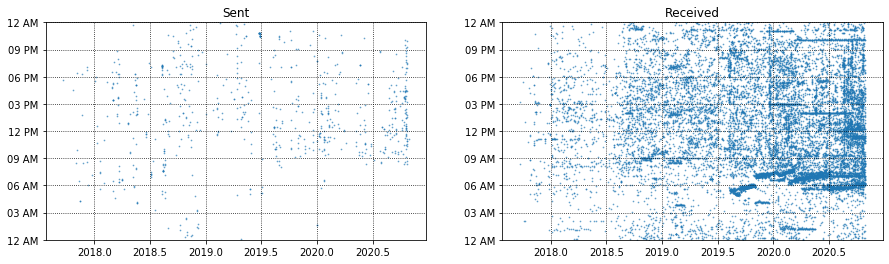

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent') 
plot_todo_vs_year(received, ax[1], title='Received')

Have a look at the above graph. The higher the density of the data points on the graph, the greater the number of emails.Notice that the amount of emails sent is less than the number of emails received. From 2018 until 2020, I got more emails than I sent.
usuall I send mails from 9:00 AM to 9:PM after the second half of 2019. from the graph we can also understand that from 2018 to first half of 2019 I have send most mails during 3:00 AM to 6:00 PM which is obious as I shifted to Ireland in the year 2019 for my masters and the time difference of Ireland and India is 5 hours

Notice that between 06:00 AM and 03:PM, I received most of the emails.

A nice summary of the time of day of email operation is given in this graph.


<b> 3. Average number of emails per day &  Average number of emails per hour </b>

To do so, we will create two functions, one that counts the total number of emails per day and one that plots the average number of emails per hour

In [72]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):    
    year = df[df['year'].notna()]['year'].values    
    T = year.max() - year.min()    
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)    
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);    
    ax.grid(ls=':', color='k')

The preceding code creates a function that plots the average number of emails per day. Similarly, let's create a function that plots the average number of emails per hour:

In [74]:
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,weight_fun=None, **plot_kwargs):
    tod = df[df['timeofday'].notna()]['timeofday'].values    
    year = df[df['year'].notna()]['year'].values    
    Ty = year.max() - year.min()    
    T = tod.max() - tod.min()    
    bins = int(T / dt)    
    if weight_fun is None:        
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)    
    else:        
        weights = weight_fun(df)    
    if smooth:        
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);        
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])        
        hst = ndimage.gaussian_filter(hst, sigma=0.75)        
        f = interp1d(x, hst, kind='cubic')        
        x = np.linspace(x.min(), x.max(), 10000)        
        hst = f(x)        
        ax.plot(x, hst, label=label, **plot_kwargs)    
    else:        
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);
        
    ax.grid(ls=':', color='k')    
    orientation = plot_kwargs.get('orientation')    
    if orientation is None or orientation == 'vertical': 
        ax.set_xlim(0, 24) 
        ax.xaxis.set_major_locator(MaxNLocator(8)) 
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_xticks()]);   
    elif orientation == 'horizontal':       
        ax.set_ylim(0, 24)        
        ax.yaxis.set_major_locator(MaxNLocator(8)) 
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]); 
    

Now, let's create a class that plots the time of the day versus year for all the emails within the given timeframe:

In [75]:
class TriplePlot:  
    def __init__(self):    
        gs = gridspec.GridSpec(6, 6)    
        self.ax1 = plt.subplot(gs[2:6, :4])    
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)    
        plt.setp(self.ax2.get_yticklabels(), visible=False);    
        self.ax3 = plt.subplot(gs[:2, :4])    
        plt.setp(self.ax3.get_xticklabels(), visible=False);
    
    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)    
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')    
        self.ax2.set_xlabel('Average emails per hour')    
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)    
        self.ax3.set_ylabel('Average emails per day') 

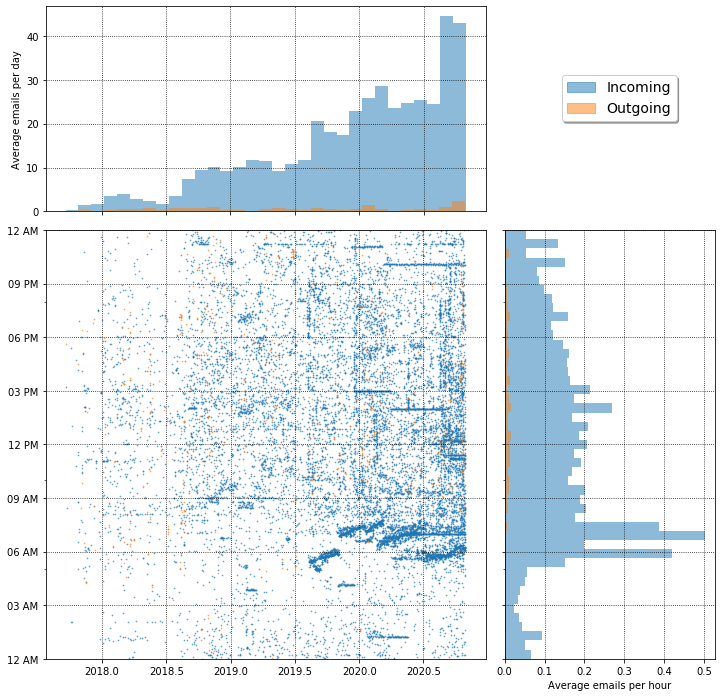

In [76]:
import matplotlib.gridspec as gridspec 
import matplotlib.patches as mpatches
plt.figure(figsize=(12,12)); 
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5) 
tpl.plot(sent, color='C1', alpha=0.5) 
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5) 
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5) 
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

The average emails per hour and per day is illustrated by the preceding graph. In my case, most email communication happened after 2020 betweem 6:00 AM to 9:00 AM 

<b>Number of emails per day</b>

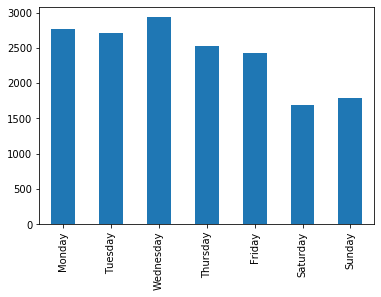

In [82]:
counts = mail_data.dayofweek.value_counts(sort=False) 
counts.plot(kind='bar')

The preceding output shows that my busiest day is Wednesday. I receive most of my emails on Wednesday. Let's go one step further and see the most active days for receiving and sending emails separately:

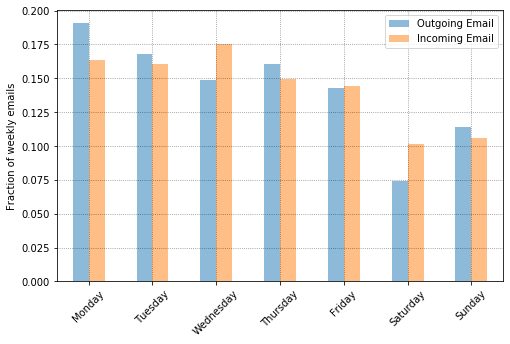

In [84]:
sdw = sent.groupby('dayofweek').size() / len(sent) 
rdw = received.groupby('dayofweek').size() / len(received)
df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw}) 
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5) 
plt.xlabel(''); 
plt.ylabel('Fraction of weekly emails'); 
plt.grid(ls=':', color='k', alpha=0.5)

The output shown in the screenshot is pretty nice, right? Now, anyone can easily understand that my most active email communication days are Wednesday for incoming emails and Monday for sending emails. That makes sense. I usually don't work on weekends, so, on Mondays, I always reply to my emails before starting the day. That is why on Monday, the analysis shows, I have more outgoing emails

<b>Most frequently used words</b>

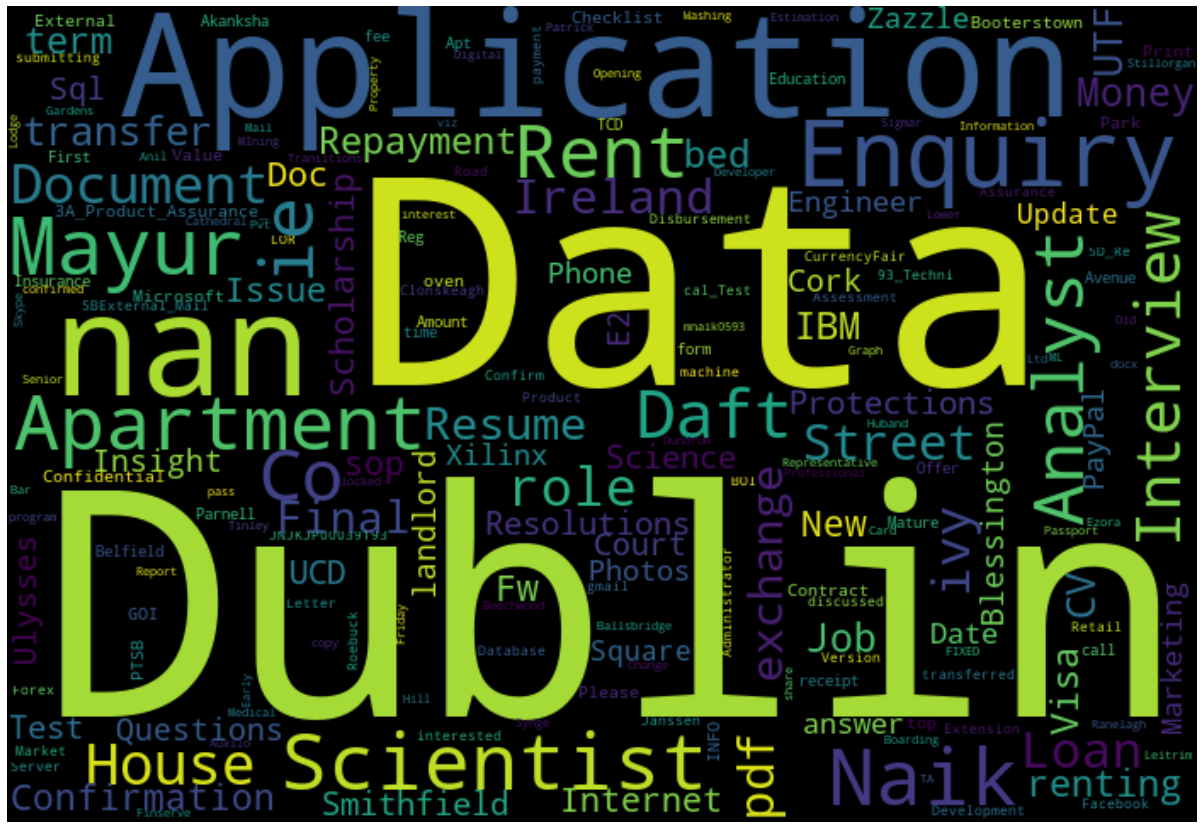

In [104]:
from wordcloud import WordCloud
df_no_arxiv = mail_data[mail_data['from'] != 'no-reply@arXiv.org'] 
text = ' '.join(map(str, sent['subject'].values))
stopwords = ['Re', 'Fwd', '3A_'] 
wrd = WordCloud(width=700, height=480, margin=0, collocations=False) 
for sw in stopwords:    
    wrd.stopwords.add(sw) 
wordcloud = wrd.generate(text)
plt.figure(figsize=(25,15)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0)